# Quantum classification

In this notebook, we see the dependence of trainability of the QML classifier on the circuit structure and the cost function.

The circuit structure is defined by two parts: the embedding part, the ansatz part.
- embedding part: the embedding circuit to encode input data into the quantum circuit.
    There are 3 types of embedding circuits used below:
    - Tensor Product Embedding (TPE): the embedding circuit is the tensor product of rotation gates (Input data as angles).
    - Hardware Efficient Embedding (HEE): the embedding circuit is the tensor product of rotation gates (Input data as angles) followed by controlled-NOT gates over adjacent qubits.
    - Classically Hard Embedding (CHE): the embedding circuit that is hard to simulate on classically.
- ansatz part: the parametrized circuit to learn the training dataset.
    There are 3 types of ansatz circuits used below:
    - Tensor Product Ansatz (TPA): the ansatz circuit is the tensor product of rotation gates (Input data as angles).
    - Hardware Efficient Ansatz (HEA): the ansatz circuit is the tensor product of rotation gates (Input data as angles) followed by controlled-NOT gates over adjacent qubits.
    - Strongly Entangling Ansatz (SEA): the ansatz circuit that is strongly entangled.

On `HEE` and `CHE`, refer to [`Subtleties in the trainability of quantum machine learning models`](https://arxiv.org/abs/2110.14753) for more details.

On `SEA`, refer to PennyLnae page: [embedding and ansatz](https://pennylane.readthedocs.io/en/stable/introduction/templates.html)

In `quantum_classification_.py`, we adopted local cost function of the form $C_{\mathrm{L}}=\operatorname{Tr}\left[\rho(\boldsymbol{\theta})O_{\mathrm{L}}\right] = 1 - \frac1n\sum_j p_{|{0}\rangle_j}$
, where $ \rho(\boldsymbol{\theta}) = V(\boldsymbol{\theta})|\mathbf{0}\rangle\langle\mathbf{0}| V(\boldsymbol{\theta})^{\dagger}$ and $O_{\mathrm{L}}=\mathbb{1}-\frac{1}{n} \sum_{j=1}^{n}|0\rangle\langle 0|_{j} \otimes \mathbb{1}_{\bar{j}}$


as used in `Cost-Function-Dependent Barren Plateaus in Shallow Quantum Neural Networks`

## 1. Iris dataset with 2 features and 2 labels

In [1]:
from pennylane import numpy as np
from sklearn.model_selection import train_test_split


import sys
sys.path.append('..')
from src.quantum_classification_ import *

In [2]:
data = np.loadtxt("../data/iris_classes1and2_scaled.txt")
X = data[:,:2] # use first 2 features out of 4
Y = data[:,-1] # last column is the class
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [3]:
print(X.shape, Y.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(100, 2) (100,)
(80, 2) (80,)
(20, 2) (20,)


## TPE TPA

In [7]:
# settings
nqubits = X.shape[1]; embedding_nlayers = 1; ansatz_nlayers = 2; embedding_type = 'TPE'; ansatz_type = 'TPA'; cost_type = 'MSE'
label = f'{embedding_type}, {ansatz_type}'

iris = QuantumClassifier(x_train, y_train, nqubits, embedding_nlayers, ansatz_nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=50)

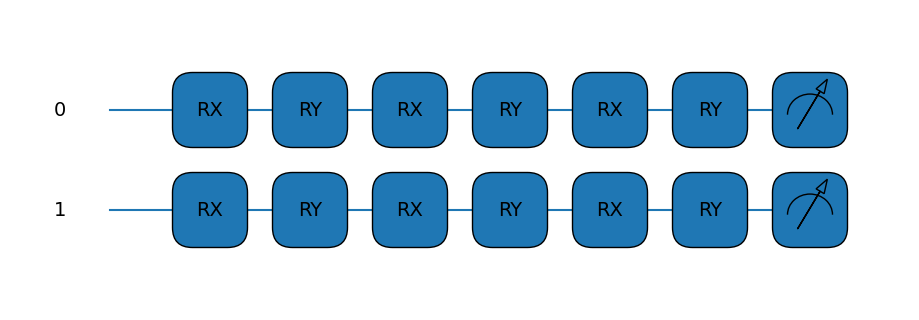

In [8]:
iris.draw_circuit()

In [9]:
iris.optimize()

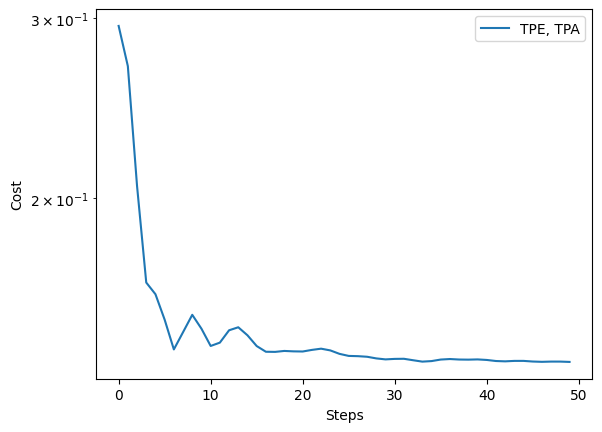

In [10]:
iris.plot_cost()

In [11]:
print('accuracy ', iris.accuracy(x_test, y_test))
print('optimized cost; ', iris.cost_list[-1])

accuracy  1.0
optimized cost;  0.1383611414238922
